# TSA Claims Analysis

## by Justin Sierchio

In this analysis, we will be looking at claims made through the US Transportation Security Administration (TSA) from 2002 to 2015. Ideally, we would like to be able to answer the following questions:

<ul>
    <li>Which airports have the most complaints?</li>
    <li>What are the most likely claims made?</li>
    <li>Are there certain times of the year where more incidents are likely to occur?</li>
</ul>

This data is in .csv file format and is from Kaggle at: https://www.kaggle.com/perrychu/tsa-claims-classification-part-1. More information related to the dataset can be found at: https://www.kaggle.com/terminal-security-agency/tsa-claims-database.

Special thanks to 'perrychu' at Kaggle for their data cleaning procedure.

## Notebook Initialization

In [1]:
# Import Relevant Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import re

print('Initial libraries loaded into workspace!')

Initial libraries loaded into workspace!


In [2]:
# Upload Datasets for Study
df_TSA = pd.read_csv("tsa_claims_clean.csv");

print('Datasets uploaded!');

Datasets uploaded!


C:\Users\jmsie\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# Display 1st 5 rows from TSA Claims dataset
df_TSA.head()

,Claim_Number,Airline_Name,Claim_Type,Claim_Site,Item,Status,Date_Received,Incident_Date,Airport_Code_Group,Airport_Name_Group,Claim_Value,Close_Value
0,0909802M,ContinentalAirlines,Property Damage,Checkpoint,Other,Approved,2002-01-04,2002-12-12,EWR,Newark International Airport,350.00,350.00
1,0202417M,-,Property Damage,Checked Baggage,Luggage (all types including footlockers),Settled,2002-02-02,2004-01-16,SEA,Seattle-Tacoma International,100.00,50.00
2,0202445M,AmericanAirlines,Property Damage,Checked Baggage,Cell Phones,Settled,2002-02-04,2003-11-26,STL,Lambert St. Louis International,278.88,227.92
3,0909816M,AmericanAirlines,Property Damage,Checkpoint,Luggage (all types including footlockers),Approved,2002-02-07,2003-01-06,MIA,Miami International Airport,50.00,50.00
4,2005032379513,DeltaAirLines,Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,Approved,2002-02-18,2005-02-05,MCO,Orlando International Airport,84.79,84.79


Let's describe what each of the columns in this dataset mean.

<ul>
    <li>Claim_Number: Self-Explanatory</li>
    <li>Airline_Name: Self-Explanatory</li>
    <li>Claim_Type: Self-Explanatory</li>
    <li>Claim_Site: Where did the incident occur?</li>
    <li>Item: What kind of item was the incident involving?</li>
    <li>Status: What happened with the claim?</li>
    <li>Date_Received: When was the claim received?</li>
    <li>Incident_Date: When did the claim incident occur?</li>
    <li>Airport_Code_Group: Code name for the airport</li>
    <li>Airport_Name_Group: Name of the airport?</li>
    <li>Claim_Value: Value of the claim?</li>
    <li>Close_Value: Value for settling the claim.</li>
</ul>

## Data Information

Let's show the basic data statistics. 

In [4]:
df_TSA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145012 entries, 0 to 145011
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Claim_Number        145012 non-null  object 
 1   Airline_Name        145012 non-null  object 
 2   Claim_Type          145012 non-null  object 
 3   Claim_Site          145012 non-null  object 
 4   Item                145012 non-null  object 
 5   Status              145012 non-null  object 
 6   Date_Received       145012 non-null  object 
 7   Incident_Date       145012 non-null  object 
 8   Airport_Code_Group  145012 non-null  object 
 9   Airport_Name_Group  145012 non-null  object 
 10  Claim_Value         145012 non-null  float64
 11  Close_Value         128542 non-null  float64
dtypes: float64(2), object(10)
memory usage: 13.3+ MB


So we have 145k+ incidents to work with. Let's get started!

## Exploratory Data Analysis

To begin our analysis, let's look at the Top 20 airports for TSA claims. Since we've removed some data, we'll show the results in percentages rather than raw numbers.

In [5]:
# List the Top 20 Airports for TSA Complaints
print('Here are the Top 20 Airports with TSA Claims 2002-2015:\n')
print('Airport Name                         # TSA Claims (% of Total)\n')
df_TSA_TypePerc = 100. * df_TSA['Airport_Name_Group'].value_counts() / len(df_TSA);
print(df_TSA_TypePerc.head(20))

Here are the Top 20 Airports with TSA Claims 2002-2015:

Airport Name                         # TSA Claims (% of Total)

Other                                               7.152512
Los Angeles International Airport                   4.909249
John F. Kennedy International                       3.965879
Chicago O'Hare International Airport                3.635561
Newark International Airport                        3.599012
Miami International Airport                         3.070091
Orlando International Airport                       3.035611
Seattle-Tacoma International                        2.841144
Hartsfield-Jackson Atlanta International Airport    2.726671
Phoenix Sky Harbor International                    2.591510
-                                                   2.568063
McCarran International                              2.446004
Philadelphia International Airport                  2.373597
Dallas-Fort Worth International Airport             2.238435
Ft. Lauderdale-Hollywood 

As we can see from our cleaned, complete dataset, LAX (Los Angeles International Airport) had the most TSA claims, followed by JFK (New York City - John F. Kennedy International Airport) and ORD (Chicago O'Hare International Airport).

Let's take a look at the frequency of types of claims next.

In [6]:
# List the types of TSA Claims
print('Here are the Top Claim Types with the TSA 2002-2015:\n')
print('Claim Type           # TSA Claims (% of Total)\n')
df_TSA_ClaimTypePerc = 100. * df_TSA['Claim_Type'].value_counts() / len(df_TSA);
print(df_TSA_ClaimTypePerc)

Here are the Top Claim Types with the TSA 2002-2015:

Claim Type           # TSA Claims (% of Total)

Passenger Property Loss    56.435329
Property Damage            38.712658
-                           3.642457
Personal Injury             0.475823
Passenger Theft             0.294458
Employee Loss (MPCECA)      0.288942
Motor Vehicle               0.147574
Complaint                   0.002069
Bus Terminal                0.000690
Name: Claim_Type, dtype: float64


According to our analysis, the vast majority of claims involve passenger property loss and property damage.

Now let's look at the item list and airline names, respectively.

In [7]:
# List the items for TSA Claims
print('Here are the Top Items with the TSA 2002-2015:\n')
print('Item Type                                            # TSA Claims (% of Total)\n')
df_TSA_ItemTypePerc = 100. * df_TSA['Item'].value_counts() / len(df_TSA);
print(df_TSA_ItemTypePerc.head(12))

Here are the Top Items with the TSA 2002-2015:

Item Type                                            # TSA Claims (% of Total)

Other                                                           19.945936
Luggage (all types including footlockers)                       11.868673
Clothing - Shoes; belts; accessories; etc.                       9.191653
Locks                                                            6.131217
Jewelry - Fine                                                   5.885030
Cameras - Digital                                                5.743663
Computer - Laptop                                                5.316801
-                                                                2.561857
Eyeglasses - (including contact lenses)                          2.473588
Cosmetics - Perfume; toilet articles; medicines; soaps; etc.     2.217058
Currency                                                         1.585386
Cell Phones                                               

As one might expect, luggage was the most frequent item at about 15%. Also perhaps not surprising on this top 10 list were digital cameras, fine jewelry, laptop computers, cosmetics, currency and cell phones. A possible hypothesis is that certain entities are committing theft at airports.

In [8]:
# List the Top Airlines for TSA Complaints
print('Here are the Top 20 Airlines with TSA Claims 2002-2015:\n')
print('Airline Name         # TSA Claims (% of Total)\n')
df_TSA_AirlineTypePerc = 100. * df_TSA['Airline_Name'].value_counts() / len(df_TSA);
print(df_TSA_AirlineTypePerc.head(20))

Here are the Top 20 Airlines with TSA Claims 2002-2015:

Airline Name         # TSA Claims (% of Total)

-                      19.801120
DeltaAirLines          11.992111
AmericanAirlines       11.854881
UAL                     9.355088
SouthwestAirlines       8.993049
ContinentalAirlines     6.628417
USAir                   6.536011
NorthwestAirlines       5.911235
JetBlue                 3.303865
AlaskaAirlines          3.296279
AirTranAirlines         2.332910
AmericaWest             1.162662
FrontierAirlines        1.035087
SpiritAirlines          0.826139
HawaiianAirlines        0.619949
BritishAirways          0.530301
AllegiantAir            0.428930
AirCanada               0.428240
Lufthansa               0.378589
VirginAtlantic          0.328938
Name: Airline_Name, dtype: float64


As our analysis shows from our cleaned dataset, American Airlines had a higher % of claims than any other airline with near 15% of the overall total. Rounding out the top 5 were Delta, United, Southwest and Continental. [Note this set was collected before the AA-USAir merger].

Now let's work on answering the question regarding time of year or holidays and any relation to claims.

Text(0, 0.5, 'Incident Frequency')

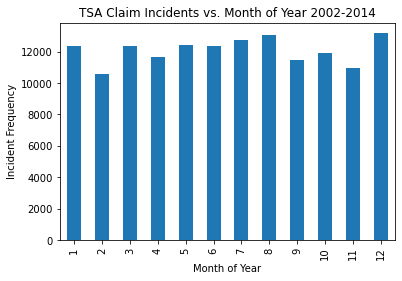

In [9]:
# Convert Date Format to that which Pandas can understand
df_TSA["Incident_Dates"] = df_TSA["Incident_Date"].astype("datetime64")

# Group Dates by Month and plot on a bar char
df_TSA["Incident_Dates"].groupby(df_TSA["Incident_Dates"].dt.month).count().plot(kind="bar")
plt.title('TSA Claim Incidents vs. Month of Year 2002-2014')
plt.xlabel('Month of Year')
plt.ylabel('Incident Frequency')

As one can see, there are at least 10k incidents for each month. However, there appear to be slightly more incidents in (a) the summer months of Jun, Jul, and August and (b) the winter holiday season of Dec and Jan.

In order to look at specific holidays, let us make a plot for each week of the year.

Text(0, 0.5, 'Incident Frequency')

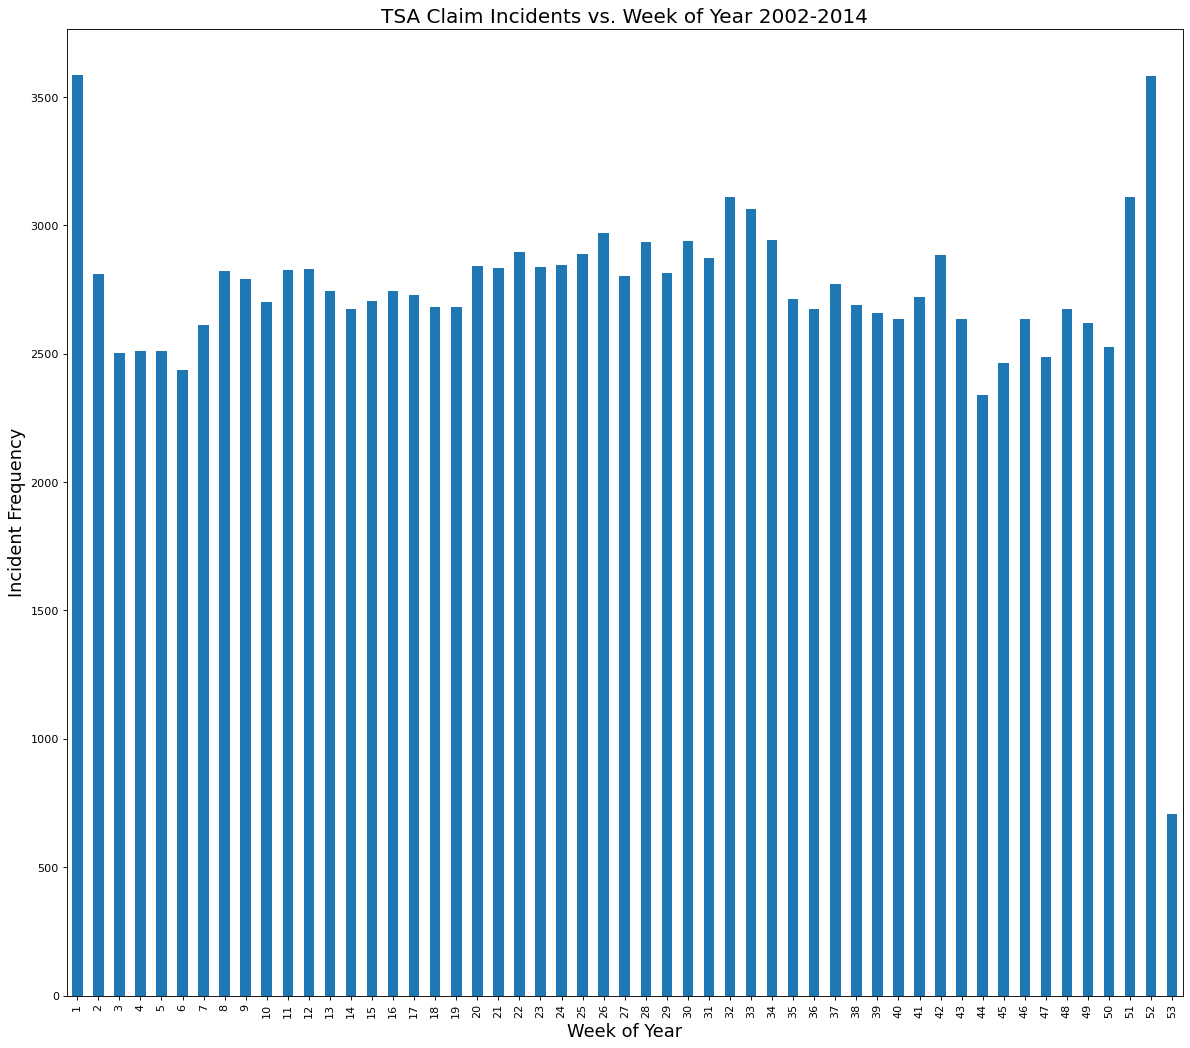

In [10]:
# Group Dates by Month and plot on a bar char
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 16), dpi=80, facecolor='w', edgecolor='k')

df_TSA["Incident_Dates"].groupby(df_TSA["Incident_Dates"].dt.weekofyear).count().plot(kind="bar")
plt.title('TSA Claim Incidents vs. Week of Year 2002-2014', fontsize = 18)
plt.xlabel('Week of Year', fontsize = 16)
plt.ylabel('Incident Frequency', fontsize = 16)

From the plot shown above, we can see that the greatest number of incidents occur during the weeks of New Year's Day (1) and Christmas Day (Week 52). There is also a spike in Weeks 32 and 33, which correspond to the end of July/beginning of August. Though there are no US Federal holidays during that time, a possible spike may during that time may be the result of increased travel for college students returning to campus for the fall semester.

Interestingly enough, the lowest number of incidents occur in Week 44, corresponding to late October.

## Additional Data Analysis

Now that we have completed our original analysis, let us determine if there is a relationship between the type of claim and where the incident occurs. For example, is property damage more likely at the checkpoints or elsewhere in an airport?

To accomplish this task, we first need to create variables for each of the potential incident locations and claim types.

In [11]:
# Create Variables for Claim Type
df_TSA1 = df_TSA.copy();
df_TSA1[['Passenger Property Loss', 'Property Damage', 'Personal Injury', '-', 'Passenger Theft', 
         'Employee Loss (MPCECA)', 'Motor Vehicle', 'Complaint', 'Bus Terminal']] = pd.get_dummies(df_TSA1['Claim_Type'])
df_TSA1[['Checked Baggage', 'Checkpoint', 'Other', 'Motor Vehicle', '-', 'Bus Station']] = pd.get_dummies(df_TSA1['Claim_Site'])
df_TSA1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145012 entries, 0 to 145011
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Claim_Number             145012 non-null  object        
 1   Airline_Name             145012 non-null  object        
 2   Claim_Type               145012 non-null  object        
 3   Claim_Site               145012 non-null  object        
 4   Item                     145012 non-null  object        
 5   Status                   145012 non-null  object        
 6   Date_Received            145012 non-null  object        
 7   Incident_Date            145012 non-null  object        
 8   Airport_Code_Group       145012 non-null  object        
 9   Airport_Name_Group       145012 non-null  object        
 10  Claim_Value              145012 non-null  float64       
 11  Close_Value              128542 non-null  float64       
 12  Incident_Dates  

Text(0.5, 1.0, 'Claim Type vs. Claim Site: Correlation Matrix - TSA 2002-2014')

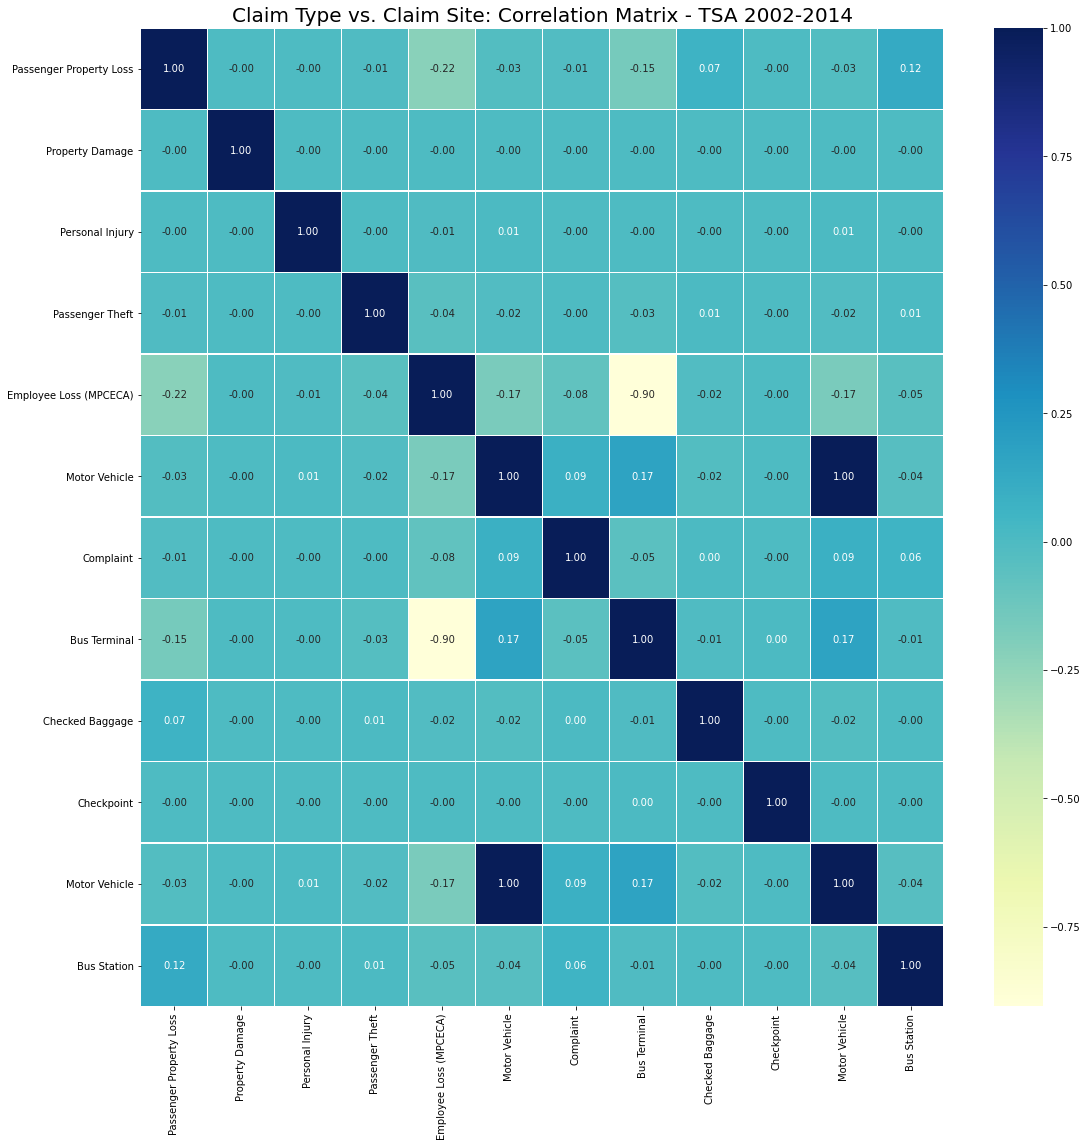

In [12]:
# Quality and Average Wins vs. Tournament Performance Matrix
# Select the features to do the analysis
df_TSA1_fs1 = df_TSA1[['Passenger Property Loss', 'Property Damage', 'Personal Injury', 'Passenger Theft', 
         'Employee Loss (MPCECA)', 'Motor Vehicle', 'Complaint', 'Bus Terminal', 'Checked Baggage', 'Checkpoint', 
                       'Motor Vehicle', 'Bus Station']]

#  Quality and Average Wins vs. Tournament Performance Matrix
figureLoss, axisLoss = plt.subplots(figsize=(18, 18));
sns.heatmap(df_TSA1_fs1.corr(), annot = True, linewidths = .5, fmt = '.02f', ax = axisLoss, cmap="YlGnBu");

plt.title('Claim Type vs. Claim Site: Correlation Matrix - TSA 2002-2014', fontsize = 20)

From the correlation heatmap shown above, the main interesting relationships we see are the passenger property loss at bus stations and in checked baggage. These observations would appear to suggest that either baggage is placed on the wrong flight or items are lost going to/from the airport (i.e. rental car facility, hotel).

We also see a relationship between complaints and bus stations, which may be a confirmation of the previous observation.

As a final step in this project, let us determine which items have the best reimbursement values. We will define reimbursement as a percantage of the closing value compared to the claim value.

In [13]:
# Create Reimbursement Percentage Variable
df_TSA['Reimbursement Percentage'] = 100 * ((df_TSA['Close_Value']) / (df_TSA['Claim_Value'] + 0.000001));
df_TSA.head(10)

,Claim_Number,Airline_Name,Claim_Type,Claim_Site,Item,Status,Date_Received,Incident_Date,Airport_Code_Group,Airport_Name_Group,Claim_Value,Close_Value,Incident_Dates,Reimbursement Percentage
0,0909802M,ContinentalAirlines,Property Damage,Checkpoint,Other,Approved,2002-01-04,2002-12-12,EWR,Newark International Airport,350.00,350.00,2002-12-12,100.000000
1,0202417M,-,Property Damage,Checked Baggage,Luggage (all types including footlockers),Settled,2002-02-02,2004-01-16,SEA,Seattle-Tacoma International,100.00,50.00,2004-01-16,50.000000
2,0202445M,AmericanAirlines,Property Damage,Checked Baggage,Cell Phones,Settled,2002-02-04,2003-11-26,STL,Lambert St. Louis International,278.88,227.92,2003-11-26,81.726907
3,0909816M,AmericanAirlines,Property Damage,Checkpoint,Luggage (all types including footlockers),Approved,2002-02-07,2003-01-06,MIA,Miami International Airport,50.00,50.00,2003-01-06,99.999998
4,2005032379513,DeltaAirLines,Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,Approved,2002-02-18,2005-02-05,MCO,Orlando International Airport,84.79,84.79,2005-02-05,99.999999
5,2005032479636,AirTranAirlines,Passenger Property Loss,Checked Baggage,Other,Settled,2002-02-18,2005-02-17,CAK,Akron-Canton Regional,459.01,227.00,2005-02-17,49.454260
6,2007050124750,USAir,Passenger Property Loss,Checked Baggage,Professional Equipment,Approved,2002-04-30,2007-04-26,PHL,Philadelphia International Airport,106.52,106.52,2007-04-26,99.999999
7,12772,SouthwestAirlines,-,Checkpoint,Clothing - Shoes; belts; accessories; etc.,Approved,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,75.00,75.00,2002-05-09,99.999999
8,2004102965797,-,Passenger Property Loss,Checkpoint,Jewelry - Fine,Denied,2002-06-25,2002-05-04,ATL,Hartsfield-Jackson Atlanta International Airport,4457.29,NaN,2002-05-04,NaN
9,2005071188575,AmericanAirlines,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,Approved,2002-07-06,2005-06-23,ORD,Chicago O'Hare International Airport,79.95,79.95,2005-06-23,99.999999


Now let us display the items as sorted by the highest reimbursement percentage. We'll use the top 10 items claimed list from earlier in the project.

In [14]:
# Find the Reimbursement Percentages for each of the 10 most claimed items
LuggageReimbursement = (df_TSA.loc[df_TSA['Item'] == 'Luggage (all types including footlockers)', 
           'Reimbursement Percentage'].sum()) / (df_TSA.loc[df_TSA['Item'] == 'Luggage (all types including footlockers)', 
           'Reimbursement Percentage'].count());

ClothingReimbursement = (df_TSA.loc[df_TSA['Item'] == 'Clothing - Shoes; belts; accessories; etc.', 
           'Reimbursement Percentage'].sum()) / (df_TSA.loc[df_TSA['Item'] == 'Clothing - Shoes; belts; accessories; etc.', 
           'Reimbursement Percentage'].count());

LocksReimbursement = (df_TSA.loc[df_TSA['Item'] == 'Locks', 
           'Reimbursement Percentage'].sum()) / (df_TSA.loc[df_TSA['Item'] == 'Locks', 
           'Reimbursement Percentage'].count());

JewelryReimbursement = (df_TSA.loc[df_TSA['Item'] == 'Jewelry - Fine', 
           'Reimbursement Percentage'].sum()) / (df_TSA.loc[df_TSA['Item'] == 'Jewelry - Fine', 
           'Reimbursement Percentage'].count());

CameraReimbursement = (df_TSA.loc[df_TSA['Item'] == 'Cameras - Digital', 
           'Reimbursement Percentage'].sum()) / (df_TSA.loc[df_TSA['Item'] == 'Cameras - Digital', 
           'Reimbursement Percentage'].count());

LaptopReimbursement = (df_TSA.loc[df_TSA['Item'] == 'Computer - Laptop', 
           'Reimbursement Percentage'].sum()) / (df_TSA.loc[df_TSA['Item'] == 'Computer - Laptop', 
           'Reimbursement Percentage'].count());

EyeglassReimbursement = (df_TSA.loc[df_TSA['Item'] == 'Eyeglasses - (including contact lenses)', 
           'Reimbursement Percentage'].sum()) / (df_TSA.loc[df_TSA['Item'] == 'Eyeglasses - (including contact lenses)', 
           'Reimbursement Percentage'].count());

ToiletriesReimbursement = (df_TSA.loc[df_TSA['Item'] == 'Cosmetics - Perfume; toilet articles; medicines; soaps; etc.', 
           'Reimbursement Percentage'].sum()) / (df_TSA.loc[df_TSA['Item'] == 'Cosmetics - Perfume; toilet articles; medicines; soaps; etc.', 
           'Reimbursement Percentage'].count());

CurrencyReimbursement = (df_TSA.loc[df_TSA['Item'] == 'Currency', 
           'Reimbursement Percentage'].sum()) / (df_TSA.loc[df_TSA['Item'] == 'Currency', 
           'Reimbursement Percentage'].count());

PhoneReimbursement = (df_TSA.loc[df_TSA['Item'] == 'Cell Phones', 
           'Reimbursement Percentage'].sum()) / (df_TSA.loc[df_TSA['Item'] == 'Cell Phones', 
           'Reimbursement Percentage'].count());

In [15]:
# Print the Reimbursement Amounts
print('The Reimbursement Rates for each of the 10 most claimed items are as follows:')
print('Luggage:         ', round(LuggageReimbursement, 2))
print('Clothing:        ', round(ClothingReimbursement,2))
print('Locks:           ', round(LocksReimbursement,2))
print('Jewelry:         ', round(JewelryReimbursement, 2))
print('Digital Cameras: ', round(CameraReimbursement, 2))
print('Laptops:         ', round(LaptopReimbursement, 2))
print('Eyeglass:        ', round(EyeglassReimbursement, 2))
print('Toiletries:      ', round(ToiletriesReimbursement, 2))
print('Currency:        ', round(CurrencyReimbursement, 2))
print('Cell Phones:     ', round(PhoneReimbursement,2 ))

The Reimbursement Rates for each of the 10 most claimed items are as follows:
Luggage:          42.57
Clothing:         50.7
Locks:            50.06
Jewelry:          30.75
Digital Cameras:  29.5
Laptops:          25.94
Eyeglass:         58.02
Toiletries:       35.7
Currency:         33.76
Cell Phones:      40.51


As one can see, eyeglasses have the highest reimbursement at 58% while digital cameras have the lowest reimbursement rate at 29.5%.

## Results and Discussion

In this open-ended project, we were able to arrive at some interesting results:

<ul>
    <li>(1) The majority of claims in US airports involve personal property loss.</li>
    <li>(2) Delta AirLines leads the nation in claims.</li>
    <li>(3) The Christmas/New Year's holiday season sees the most claim incidents of any time of the year.</li>
    <li>(4) Personal property loss is disproportionally happens at airport bus stations than actually in the terminal.</li>
    <li>(5) Eyeglasses have the highest reimbursement rates among the 10 most frequency claimed items.</li>
</ul>

## Conclusion

The goal of this project was to explore TSA airport claims from 2002-2014. In this project, we were able to upload a real-world dataset, clean the data systematically, perform several different exploratory data analysis, make useful data visualizations, and draw logical inferences from those analyses. It is the author's hope that others find this exericse useful. Thanks for reading!